In [1]:
import warnings

warnings.filterwarnings("ignore")

import ast
import itertools
import json
import math
import os
import re
import sys
from collections import Counter
from copy import deepcopy
from functools import reduce
from pathlib import Path

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from networkx.algorithms.shortest_paths.weighted import dijkstra_path_length
from rich import print
from tqdm import tqdm

In [2]:
def plot_mtx(mtx, figsize=(10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.matshow(mtx, cmap=plt.cm.Blues)
    plt.plot()

In [3]:
def read_file_to_str_li(fp, print_exp=True):
    with open(fp, "r") as f:
        lines = f.read().split("\n")
    if print_exp:
        print(f"Read from {fp}:")
        print(f"First line: {lines[0]} | Last line: {lines[-1]}")
        print("-" * 6)

    return lines


# define the function blocks
def convert_to_int(input_str):
    if input_str == "" or input_str == " ":
        return None
    return int(input_str)


def convert_to_str(input_str):
    return str(input_str)


# map the inputs to the function blocks
converts = {
    "i": convert_to_int,
    "s": convert_to_str,
}


def convert_str_li_to_other_li(
    str_li, pattern="i", per_letter=False, sep=" ", start_row=0, end_row=None
):
    """Convert a list of string to a list of other types

    pattern: a list of types for one item.
        'i' for int, 's' for string
        'si' means: convert the 1st item to string, the rest to integer
        If separated items are more than pattern items,
        use the last one from the parttern.
    if per_letter=True, ignore sep and separate item per letter
    """
    target_str_li = str_li[start_row:end_row]
    # find max item num
    max_item_num = 1
    if per_letter:
        max_item_num = max([len(s) for s in target_str_li])
    else:
        max_item_num = max([len(s.split(sep)) for s in target_str_li])

    # extend the pattern to the max itme num
    pattern = (
        pattern + f"{pattern[-1]}" * (max_item_num - len(pattern))
        if max_item_num > len(pattern)
        else pattern
    )

    # convert
    if per_letter:
        return [
            [converts[pattern[idx]](item) for idx, item in enumerate(s)]
            for s in target_str_li
        ]
    else:
        if sep == " ":
            return [
                [converts[pattern[idx]](item) for idx, item in enumerate(s.split())]
                for s in target_str_li
            ]
        else:
            return [
                [converts[pattern[idx]](item) for idx, item in enumerate(s.split(sep))]
                for s in target_str_li
            ]

In [4]:
fp = "input.txt"
lines = read_file_to_str_li(fp)

print("Convert to:")

# head = convert_str_li_to_other_li(
#     lines, pattern="s", per_letter=True, sep=",", start_row=0, end_row=1
# )

# print(f"Head:\n{head}")
# print(f"First line: {head[0]}")
# print(f"Last line: {head[-1]}")

data = convert_str_li_to_other_li(
    lines, pattern="s", per_letter=True, sep=" ", start_row=None, end_row=None
)


print(f"First line: {data[0]}")
print(f"Last line: {data[-1]}")
print("-" * 6)

Read from input.txt:

First line:                                                   ..#......#.#...................
...........##.......#.................##.........#.#............#.... | Last line: 23R40R49L3
5R17R7L43R8R11L6R28R8L30L40L28R9R22L2R5L6L6R26R27L37L17L29L9R29L42R29L27R4R26R47R11R6R18R43R1
5R32L13L39L46L7R30L23R46R40R44L40L28L25L33R28R3R1R43R43R39L15L6L16R26R17L31L39L41L29L16R41R25
R48R17R12R35L9R14R47L22L20R24R45R8R35L23L46L39R18R34R25R33L38R15L49R24R22L40L11R3R43L18R2L9R1
0R13R2R15R16L34L34R43R15R4R40R16R19R16R39L40L37R16L32L13R11R20R25L19L10R29L48L28L38L4L14L12R1
4R47R18R15L6R20R28L28R8L29L13L7L19L33L48R26R32L34R34R40R8R2L6R20R45R33L36R25R27R27R42L34L17L3
2L5R13L1R9R34R6L13L36R39L38R13L31R32L40L23L23L26R7R34R2R12L24R39L44L30R2L21L15R15R39R10R23R24
R34L50L34L11R6R9R10R50L42L39L20L21R15R10L41R6L50L13L17R23L17R38R18L37L4L14R4R45R36L15R1R37L14
L16L19L42R8L35L47R24R20R2L41R35R3R22R6R20R12R38L4R2R29R24R45R8R3L42L14L41R5L35L24L49R25R35L50
R1R8R47L28R41R46R20L9L10R17R27L7L15R25L31L7L22R1R31L36R2R14R42R4L48R5L19L39L28L9L36R44L46R42L
35L16L41L31R5R14L34R35R3L18R5R7L19L30L13R24L13L15R49R14R31R27L40L27R45L8L19L34R13L43R18R29R4L
1L3L2L41R41L7L20R25R33L3L15R15R36R15L33R39R33R36L27R47R6L32R24R8R40R34R3R25L12L49L19L23L21L35
L41L32L48R2R46L8L3L10L17L25L8R47R10L40L33L4L21L49R16L48R42L23R45R3R29L50L50R41L9L28L36L22L41L
7L4L42L45L21R49R19R18R2L9L42R11R24R38L50R17R30L37L11L22R43R43R27R22R50L22R2L20R40R17L42L19L45
R47R45R6R8R22R37L10R24L23R31R43R48L45R2R10R48R8R31L8L36R39L8L44R1L40L44R33L1L2L42L45R5L1L20L4
7L23L39L6R23L29R45R11L14R10R36R47R6R15R3R22R22L29L10R32L12L40L21L48R47L14R9L26R35R23R1L38L43L
26R26L4L48R13L39L3L38R47L45R30L16R43L18R19R3R6L5R16L35L15L45R35L35R2L11R6R50R22L36R8L18R44L19
R42R16R45R9R38R8R47R47L10R19L18R14R13R49L29R6R19L40R7L34L7R28L27R31L17R14R28L5R16L48R44L38R33
R43R36R28L1L25R28R49R31L31R19R30R50L33L16L49L19R31R5R37R45R47R22R40R43L43R9L33R28R33R17L12R25
R33R30L35L34R46R23L2L49L39L10R6L35R24L30L19L41L46R5L35L20L13R32L23R4R34L16R46R9L23L23R26L37R3
R47R44L5L43R31R21R36R1L46R18L7L26L34L41L14R35R9L1R18R2R25R9L8L19R44R17L46R10R7R24L18R8L2R7R43
L20L30L19R31L1L31R25R25R23L5R44R22L46L46R28R31R30R9R6R18R30L3R19L39L35R13R30L11L38R23R2L24R48
R5L3R10R27L48R30R8R40R16L40L37L26L3L15L50R36R15L9L23R29L48R40L6R4L26R25R34L24L38L27R34L10L29L
31R23L50R1L49R1R21R26R4R47R32L15L21L34R36R39R9R29R46R29L13L48L17R16R41L21R9R28L4R35L10R23R38R
34R22L12L5R43L9L30R27L8L8L21R26L28R38R1R27R10R34R47L6R25L12R48R18R27L22R34L2R42R41L11L12L31R3
7R39R15L50L50L31L28R1R23R32L6R6L16L12R46R25R34R23L30R48L19R5L23L43R30R31R15L22L19R50L47L48R4R
3R8R14L49L15L26R12R17R11R24R17R3L7L23L39L3L35R49R30L26R23L24R29R41R19L12R48L29L14L1L41R28L24L
45L12L48L39L30L9R19R16L30R48R37L40L43L12L6L12R16R3L9L36L43L1R22L15R39L17L32R50L10R41L8L29R4R2
6R8L43R33L46R18R4R22L1R32R39R7R7R18L42L8R45L29R38L3R41L31R21R42L30R36R35L32L4L47L11L26L28L10R
8R31L22L1R2L26R27R49R26L13R45L40L42R35L20L28L7L49R8R11L42R47R37R28R6R35R37L27L7R31R24R16R40L4
0R4R6L30L30L25R37R49L14L37R26R45L5R32L4L36L30L21L45R29L5L42L20R46L11R26L35L41L33R19R41R6L40R1
1L32L2L38R9R35R25L33R19R25R39R50L38L36L32R41R2L30R21R2R22L7R32R42L36L20R22R32R31R39L43R17L15R
13R25R33R27R37R47R35R9L36R32R21R30R30R26L26R25L49R11R23R9L37R5L38R11R46R10L7R33R4R19R29L50R10
L20L49R4L16R7L23L12R18L20L42R20L19R45R2L38L23L17L39R29L44L37L33L2L15L45R28R41L29L18R30L35L4R2
L17L34R15L20R37L4R24L20R24L46L36L48L32L42R15L22R48R14L43R25R39R44L2L32R30L31L29R22R7L10R17R18
R6R50L49L24L19L16R40L14R45L36R37R22R25L28L46L18R36R15L38R39L24L4L4L47R46R5L27L23L28R35R30R11R
45L45L17R37L43R40R37R12R43R39L1R40L35L37R30L23L42R37R44R33L39R36L44L50R5L26L4R36L3R48R25R27L4
5R8L30L23L2R37R35R19R16L8R28R38R35R25L17L49L45R30L17L27L18L2R49L11R44L18R11L24L10L39L32R4L37R
26L2R24R11R15R37R18R44R12L8L47L45L39L45R42R3L45R1L37L38R7R31L3R29R21L38L45L33L40R43L11R22R45L
48L8L23R22R15R20R15R45L5R39R22L16R17R33R17R4L35R31R35L40L34L48L40R15R4L3L8L16L39L2R39R45R48R2
0R5R42R12L15R13R4L43L39R22R29R24L42R42R30L26L38L42L33L45L38R21R1R4L13R37R29R22L35L35L27L30L7R
31L9R13R2L30L33R15L47R12L11R44L10L29L39R29R29R34R31L

------

Convert to:

First line: [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 
' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' 
', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '.', '.', '#', 
'.', '.', '.', '.', '.', '.', '#', '.', '#', '.', '.', '.', '.', '.', '.', '.', '.', '.', 
'.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', 
'.', '.', '.', '#', '#', '.', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.', '.', 
'.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '#', '.', '.', '.', '.', 
'.', '.', '.', '.', '.', '#', '.', '#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', 
'.', '.', '#', '.', '.', '.', '.']

Last line: ['2', '3', 'R', '4', '0', 'R', '4', '9', 'L', '3', '5', 'R', '1', '7', 'R', '7', 
'L', '4', '3', 'R', '8', 'R', '1', '1', 'L', '6', 'R', '2', '8', 'R', '8', 'L', '3', '0', 
'L', '4', '0', 'L', '2', '8', 'R', '9', 'R', '2', '2', 'L', '2', 'R', '5', 'L', '6', 'L', 
'6', 'R', '2', '6', 'R', '2', '7', 'L', '3', '7', 'L', '1', '7', 'L', '2', '9', 'L', '9', 
'R', '2', '9', 'L', '4', '2', 'R', '2', '9', 'L', '2', '7', 'R', '4', 'R', '2', '6', 'R', 
'4', '7', 'R', '1', '1', 'R', '6', 'R', '1', '8', 'R', '4', '3', 'R', '1', '5', 'R', '3', 
'2', 'L', '1', '3', 'L', '3', '9', 'L', '4', '6', 'L', '7', 'R', '3', '0', 'L', '2', '3', 
'R', '4', '6', 'R', '4', '0', 'R', '4', '4', 'L', '4', '0', 'L', '2', '8', 'L', '2', '5', 
'L', '3', '3', 'R', '2', '8', 'R', '3', 'R', '1', 'R', '4', '3', 'R', '4', '3', 'R', '3', 
'9', 'L', '1', '5', 'L', '6', 'L', '1', '6', 'R', '2', '6', 'R', '1', '7', 'L', '3', '1', 
'L', '3', '9', 'L', '4', '1', 'L', '2', '9', 'L', '1', '6', 'R', '4', '1', 'R', '2', '5', 
'R', '4', '8', 'R', '1', '7', 'R', '1', '2', 'R', '3', '5', 'L', '9', 'R', '1', '4', 'R', 
'4', '7', 'L', '2', '2', 'L', '2', '0', 'R', '2', '4', 'R', '4', '5', 'R', '8', 'R', '3', 
'5', 'L', '2', '3', 'L', '4', '6', 'L', '3', '9', 'R', '1', '8', 'R', '3', '4', 'R', '2', 
'5', 'R', '3', '3', 'L', '3', '8', 'R', '1', '5', 'L', '4', '9', 'R', '2', '4', 'R', '2', 
'2', 'L', '4', '0', 'L', '1', '1', 'R', '3', 'R', '4', '3', 'L', '1', '8', 'R', '2', 'L', 
'9', 'R', '1', '0', 'R', '1', '3', 'R', '2', 'R', '1', '5', 'R', '1', '6', 'L', '3', '4', 
'L', '3', '4', 'R', '4', '3', 'R', '1', '5', 'R', '4', 'R', '4', '0', 'R', '1', '6', 'R', 
'1', '9', 'R', '1', '6', 'R', '3', '9', 'L', '4', '0', 'L', '3', '7', 'R', '1', '6', 'L', 
'3', '2', 'L', '1', '3', 'R', '1', '1', 'R', '2', '0', 'R', '2', '5', 'L', '1', '9', 'L', 
'1', '0', 'R', '2', '9', 'L', '4', '8', 'L', '2', '8', 'L', '3', '8', 'L', '4', 'L', '1', 
'4', 'L', '1', '2', 'R', '1', '4', 'R', '4', '7', 'R', '1', '8', 'R', '1', '5', 'L', '6', 
'R', '2', '0', 'R', '2', '8', 'L', '2', '8', 'R', '8', 'L', '2', '9', 'L', '1', '3', 'L', 
'7', 'L', '1', '9', 'L', '3', '3', 'L', '4', '8', 'R', '2', '6', 'R', '3', '2', 'L', '3', 
'4', 'R', '3', '4', 'R', '4', '0', 'R', '8', 'R', '2', 'L', '6', 'R', '2', '0', 'R', '4', 
'5', 'R', '3', '3', 'L', '3', '6', 'R', '2', '5', 'R', '2', '7', 'R', '2', '7', 'R', '4', 
'2', 'L', '3', '4', 'L', '1', '7', 'L', '3', '2', 'L', '5', 'R', '1', '3', 'L', '1', 'R', 
'9', 'R', '3', '4', 'R', '6', 'L', '1', '3', 'L', '3', '6', 'R', '3', '9', 'L', '3', '8', 
'R', '1', '3', 'L', '3', '1', 'R', '3', '2', 'L', '4', '0', 'L', '2', '3', 'L', '2', '3', 
'L', '2', '6', 'R', '7', 'R', '3', '4', 'R', '2', 'R', '1', '2', 'L', '2', '4', 'R', '3', 
'9', 'L', '4', '4', 'L', '3', '0', 'R', '2', 'L', '2', '1', 'L', '1', '5', 'R', '1', '5', 
'R', '3', '9', 'R', '1', '0', 'R', '2', '3', 'R', '2', '4', 'R', '3', '4', 'L', '5', '0', 
'L', '3', '4', 'L', '1', '1', 'R', '6', 'R', '9', 'R', '1', '0', 'R', '5', '0', 'L', '4', 
'2', 'L', '3', '9', 'L', '2', '0', 'L', '2', '1', 'R', '1', '5', 'R', '1', '0', 'L', '4', 
'1', 'R', '6', 'L', '5', '0', 'L', '1', '3', 'L', '1', '7', 'R', '2', '3', 'L', '1', '7', 
'R', '3', '8', 'R', '1', '8', 'L', '3', '7', 'L', '4', 'L', '1', '4', 'R', '4', 'R', '4', 
'5', 'R', '3', '6', 'L', '1', '5', 'R', '1', 'R', '3', '7', 'L', '1', '4', 'L', '1', '6', 
'L', '1', '9', 'L', '4', '2', 'R', '8', 'L', '3', '5', 'L', '4', '7', 'R', '2', '4', 'R', 
'2', '0', 'R', '2', 'L', '4', '1', 'R', '3', '5', 'R', '3', 'R', '2', '2', 'R', '6', 'R', 
'2', '0', 'R', '1', '2', 'R', '3', '8', 'L', '4', 'R', '2', 'R', '2', '9', 'R', '2', '4', 
'R', '4', '5', 'R', '8', 'R', '3', 'L', '4', '2', 'L', '1', '4', 'L', '4', '1', 'R', '5', 
'L', '3', '5', 'L', '2', '4', 'L', '4', '9', 'R', '2', '5', 'R', '3', '5', 'L', '5', '0', 
'R', '1', 'R', '8', 'R', '4', '7', 'L', '2', '8', 'R', '4', '1', 'R', '4', '6', 'R', '2', 
'0', 'L', '9', 'L', '1', '0', 'R', '1', '7', 'R', '2', '7', 'L', '7', 'L', '1', '5', 

------

In [5]:
max([len(line) for line in data[:-1]])

150

In [6]:
len(data[0]), len(data[-1]), len(data[-2]), len(data[-3])

(150, 5634, 0, 50)

In [7]:
mtx = np.zeros((len(data) - 2, max([len(line) for line in data[:-1]])), dtype="int64")
mtx.shape

(200, 150)

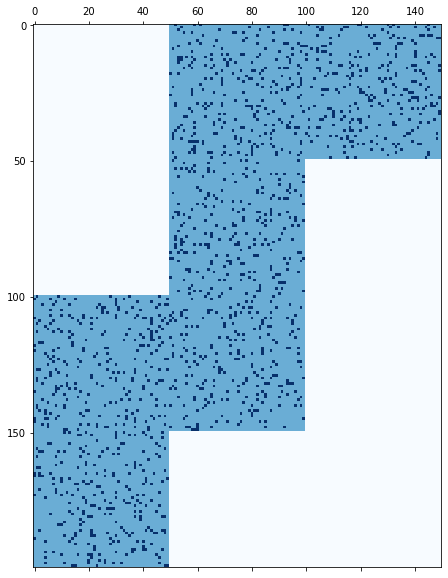

In [8]:
big_num = 999

for i, line in enumerate(data):
    for j, num in enumerate(line):
        if num == ".":
            mtx[i, j] = 1
        elif num == "#":
            mtx[i, j] = 2
plot_mtx(mtx)
mtx[mtx == 2] = big_num  # Use a large number

In [9]:
start_pos = (0, np.where(mtx[0] == 1)[0][0])

In [10]:
# Check if contains "#"
for i in range(mtx.shape[0]):
    if not np.any(mtx[i, :] == big_num):
        print(i)
for j in range(mtx.shape[1]):
    if not np.any(mtx[:, j] == big_num):
        print(j)

In [11]:
# Parse paths
paths = np.array(data[-1])
split_li = np.where(paths == "R")[0].tolist()
split_li += (np.where(paths == "R")[0] + 1).tolist()
split_li += (np.where(paths == "L")[0]).tolist()
split_li += (np.where(paths == "L")[0] + 1).tolist()
split_li.sort()
paths = [int("".join(s)) if s[0].isdigit() else s[0] for s in np.split(paths, split_li)]

In [12]:
def change_dir(direction, turn):
    return (direction + (1 if turn == "R" else 3)) % 4


print(change_dir(0, "L"))
print(change_dir(0, "R"))
print(change_dir(3, "L"))
print(change_dir(3, "R"))

3

1

2

0

In [122]:
# def find_first_num_idx(arr, num):
#     cum_num = np.cumsum(arr)
#     stop_pox = np.where(cum_num > num)[0][0] - 1
#     if stop_pox < 0:
#         return 0
#     stop_num = cum_num[stop_pox]
#     return np.where(cum_num == stop_num)[0][0] + 1

def find_first_num_idx(arr, num):
    cum_num = np.cumsum(arr)
    first_nonzero_value = cum_num[np.nonzero(cum_num)[0][0]]
    if first_nonzero_value==big_num:
        return 0
    stop_pos = np.where(cum_num > num)[0][0] - 1
    if stop_pos < 0:
        return 0
    stop_num = cum_num[stop_pos]
    return np.where(cum_num == stop_num)[0][0] + 1


print(find_first_num_idx(np.array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 999]), 2))
print(find_first_num_idx(np.array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 999]), 3))
print(find_first_num_idx(np.array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 999]), 4))
print(find_first_num_idx(np.array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 999]), 5))
print(find_first_num_idx(np.array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 999]), 6))
print(find_first_num_idx(np.array([999, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]), 6))
print(find_first_num_idx(np.array([1, 999, 0, 0, 0, 0, 0, 1, 1, 1, 1]), 6))
print(find_first_num_idx(np.array([1, 999, 0, 0, 0, 0, 0, 1, 1, 1, 999]), 6))
print(find_first_num_idx(np.array([0, 999, 0, 0, 0, 0, 0, 1, 1, 1, 999]), 6)) # 0

2

8

9

10

10

0

1

1

0

In [14]:
def move_pos(pos, direction, move):
    i, j = pos
    if direction == 0:
        arr = np.concatenate([mtx[i, j + 1 :], mtx[i, : j + 1]])
        move = find_first_num_idx(arr, move)
        j = (j + move) % mtx.shape[1]
    elif direction == 1:
        arr = np.concatenate([mtx[i + 1 :, j], mtx[: i + 1, j]])
        move = find_first_num_idx(arr, move)
        i = (i + move) % mtx.shape[0]
    elif direction == 2:
        arr = np.concatenate([np.flip(mtx[i, :j]), np.flip(mtx[i, j:])])
        move = find_first_num_idx(arr, move)
        j = (j + mtx.shape[1] - move) % mtx.shape[1]
    elif direction == 3:
        arr = np.concatenate([np.flip(mtx[:i, j]), np.flip(mtx[i:, j])])
        move = find_first_num_idx(arr, move)
        i = (i + mtx.shape[0] - move) % mtx.shape[0]
    return (i, j)

In [ ]:
pos = (2, 98)
direction = 2
move = 5

new_pos = move_pos(pos, direction, move)
print(new_pos)
print(mtx[new_pos])

In [82]:
current_pos = start_pos
current_dir = 0
print(start_pos)
records=[]
for p in tqdm(paths):
    if isinstance(p, int):
        current_pos = move_pos(pos=current_pos, direction=current_dir, move=p)
        records.append(current_pos)
    else:
        current_dir = change_dir(direction=current_dir, turn=p)
print(current_pos, current_dir)

print((current_pos[0] + 1) * 1000 + (current_pos[1] + 1) * 4 + current_dir)

(0, 50)

100%|██████████████████████████████████████████████████████| 4001/4001 [00:00<00:00, 83746.68it/s]


(125, 41)
2

126170

In [88]:
good = pd.read_csv("good.csv")[["0","1"]]

In [89]:
bad = pd.DataFrame(records)

In [95]:
df = good.join(bad)

In [115]:
def move_pos(pos, direction, move):
    i, j = pos
    if direction == 0:
        arr = np.concatenate([mtx[i, j + 1 :], mtx[i, : j + 1]])
#         print(arr)
        
        move = find_first_num_idx(arr, move)
        j = (j + move) % mtx.shape[1]
    elif direction == 1:
        arr = np.concatenate([mtx[i + 1 :, j], mtx[: i + 1, j]])
        move = find_first_num_idx(arr, move)
        i = (i + move) % mtx.shape[0]
    elif direction == 2:
        arr = np.concatenate([np.flip(mtx[i, :j]), np.flip(mtx[i, j:])])
        move = find_first_num_idx(arr, move)
        j = (j + mtx.shape[1] - move) % mtx.shape[1]
    elif direction == 3:
        arr = np.concatenate([np.flip(mtx[:i, j]), np.flip(mtx[i:, j])])
        move = find_first_num_idx(arr, move)
        i = (i + mtx.shape[0] - move) % mtx.shape[0]
    return (i, j)

def find_first_num_idx(arr, num):
    cum_num = np.cumsum(arr)
    first_nonzero_value = cum_num[np.nonzero(cum_num)[0][0]]
    if first_nonzero_value==big_num:
        return 0
    stop_pos = np.where(cum_num > num)[0][0] - 1
    if stop_pos < 0:
        return 0
    stop_num = cum_num[stop_pos]
    return np.where(cum_num == stop_num)[0][0] + 1

pos = (166, 49)
direction = 0
move = 1
new_pos = move_pos(pos, direction, move)
print(new_pos)
print(mtx[new_pos])

(166, 49)

1

In [104]:
mtx[(166,49)],mtx[(166,50)]

(1, 0)

In [105]:
mtx[166,:]

array([999,   1, 999, 999,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
       999,   1,   1, 999,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=int64)

In [102]:
df[854:859]

,0,1,0,1
854,166,49,166,49
855,166,49,166,49
856,166,49,166,50
857,166,49,17,50
858,166,30,17,49


In [101]:
df[(df["0"]!=df[0])|(df["1"]!=df[1]) ]

,0,1,0,1
856,166,49,166,50
857,166,49,17,50
858,166,30,17,49
859,153,30,16,49
860,153,24,16,138
...,...,...,...,...
1996,107,19,141,70
1997,189,19,129,70
1998,189,15,129,59
1999,189,15,125,59
